In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile

# Read sounds

In [3]:
s1 = wavfile.read("test1/mic1.wav")
s2 = wavfile.read("test1/mic2.wav")

In [4]:
S1 = np.array(s1[1],dtype=float)
S2 = np.array(s2[1],dtype=float)

In [5]:
S = np.c_[S1, S2]

# ICA Transformation

In [6]:
ica = FastICA(n_components=2)
S_ = ica.fit_transform(S)
A_ = ica.mixing_
ica.components_

array([[-0.0002175 ,  0.00023079],
       [-0.00023048, -0.00021767]])

# Sources Recovered

In [7]:
alldata = S_.tolist()
out1 = list(map(lambda x: x[0],alldata))
out2 = list(map(lambda x: x[1],alldata))

# Visualization

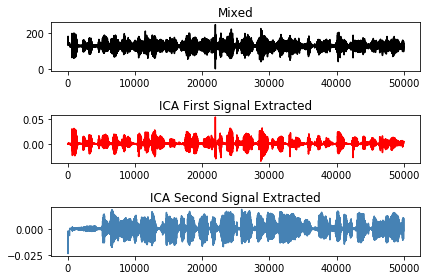

In [8]:
plt.subplot(3, 1, 1)
plt.title("Mixed")
for sig in S.T:
    plt.plot(sig, color="black")

plt.subplot(3, 1, 2)
plt.title("ICA First Signal Extracted")
sig = np.array(out1)
plt.plot(sig, color="red")

plt.subplot(3, 1, 3)
plt.title("ICA Second Signal Extracted")
sig = np.array(out2)
plt.plot(sig, color='steelblue')

plt.tight_layout()
plt.show()

# Save Results

In [9]:
wavfile.write("test1/output1.wav",s1[0], np.array(out1))
wavfile.write("test1/output2.wav",s2[0], np.array(out2))